## 빅데이터 활용 AI 설계
# CycleGAN

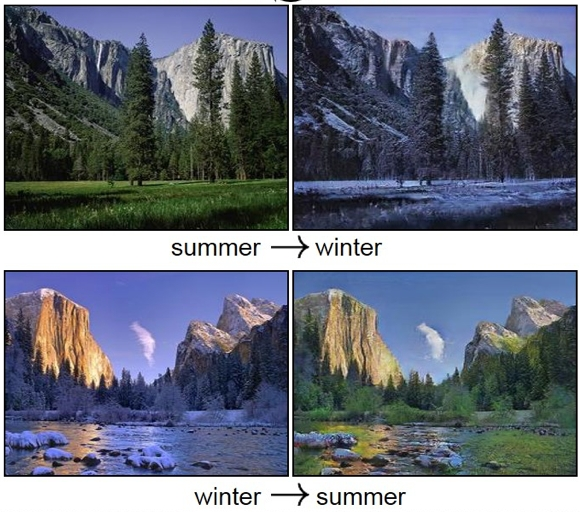

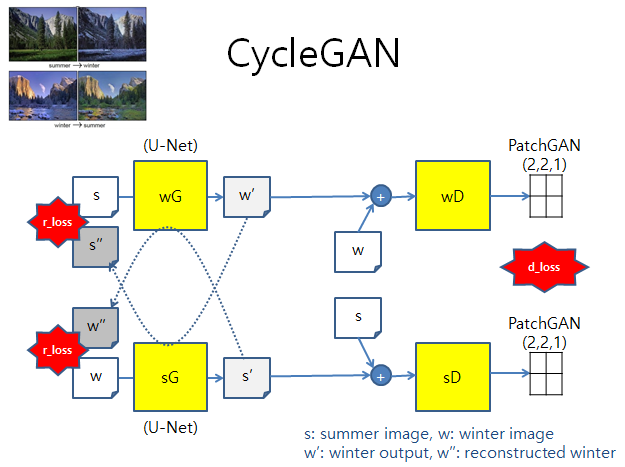

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.models import Model
from keras.layers import Conv2D, Dense, Flatten, Input, Reshape,\
    Conv2DTranspose, LeakyReLU, concatenate
from keras.optimizers import RMSprop

C:\Anaconda3\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### keras-contrib 설치
- https://github.com/keras-team/keras-contrib 참고
- keras_contrib.layers.InstanceNormalization

In [3]:
from keras_contrib.layers import InstanceNormalization

### generator for target

In [4]:
### encoder
inputs = Input((32,32,1))

e1 = InstanceNormalization()(inputs)
e1 = LeakyReLU(alpha=0.2)(e1)
e1 = Conv2D(32, (3,3), strides=1, padding='same')(e1) # (32,32,32)

e2 = InstanceNormalization()(e1)
e2 = LeakyReLU(alpha=0.2)(e2)
e2 = Conv2D(64, (3,3), strides=2, padding='same')(e2) # (16,16,64)

e3 = InstanceNormalization()(e2)
e3 = LeakyReLU(alpha=0.2)(e3)
e3 = Conv2D(128, (3,3), strides=2, padding='same')(e3) # (8,8,128)

e4 = InstanceNormalization()(e3)
e4 = LeakyReLU(alpha=0.2)(e3)
e4 = Conv2D(256, (3,3), strides=2, padding='same')(e3) # (4,4,256)

In [5]:
e4

<tf.Tensor 'conv2d_4/BiasAdd:0' shape=(?, 4, 4, 256) dtype=float32>

In [6]:
### decoder
d1 = InstanceNormalization()(e4)
d1 = LeakyReLU(alpha=0.2)(d1)
d1 = Conv2DTranspose(128, (3,3), strides=2, padding='same')(d1) # (8,8,128)
d1 = concatenate([d1,e3]) # U-Net (8,8,256)

d2 = InstanceNormalization()(d1)
d2 = LeakyReLU(alpha=0.2)(d2)
d2 = Conv2DTranspose(64, (3,3), strides=2, padding='same')(d2) # (16,16,64)
d2 = concatenate([d2,e2]) # U-Net (16,16,128)

d3 = InstanceNormalization()(d2)
d3 = LeakyReLU(alpha=0.2)(d3)
d3 = Conv2DTranspose(32, (3,3), strides=2, padding='same')(d3) # (32,32,32)
d3 = concatenate([d3,e1]) # U-Net (32,32,64)

outputs = Conv2DTranspose(3, (3,3), strides=1, padding='same',
                          activation='sigmoid')(d3) # (32,32,3)

In [7]:
g_target = Model(inputs, outputs)

In [8]:
g_target.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 1)    0                                            
__________________________________________________________________________________________________
instance_normalization_1 (Insta (None, 32, 32, 1)    2           input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 32, 32, 1)    0           instance_normalization_1[0][0]   
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 32)   320         leaky_re_lu_1[0][0]              
__________________________________________________________________________________________________
instance_n

### generator for source

In [9]:
### encoder
inputs = Input((32,32,3))

e1 = InstanceNormalization()(inputs)
e1 = LeakyReLU(alpha=0.2)(e1)
e1 = Conv2D(32, (3,3), strides=1, padding='same')(e1) # (32,32,32)

e2 = InstanceNormalization()(e1)
e2 = LeakyReLU(alpha=0.2)(e2)
e2 = Conv2D(64, (3,3), strides=2, padding='same')(e2) # (16,16,64)

e3 = InstanceNormalization()(e2)
e3 = LeakyReLU(alpha=0.2)(e3)
e3 = Conv2D(128, (3,3), strides=2, padding='same')(e3) # (8,8,128)

e4 = InstanceNormalization()(e3)
e4 = LeakyReLU(alpha=0.2)(e3)
e4 = Conv2D(256, (3,3), strides=2, padding='same')(e3) # (4,4,256)

In [10]:
e4

<tf.Tensor 'conv2d_8/BiasAdd:0' shape=(?, 4, 4, 256) dtype=float32>

In [11]:
### decoder
d1 = InstanceNormalization()(e4)
d1 = LeakyReLU(alpha=0.2)(d1)
d1 = Conv2DTranspose(128, (3,3), strides=2, padding='same')(d1)
d1 = concatenate([d1,e3]) # U-Net

d2 = InstanceNormalization()(d1)
d2 = LeakyReLU(alpha=0.2)(d2)
d2 = Conv2DTranspose(64, (3,3), strides=2, padding='same')(d2)
d2 = concatenate([d2,e2]) # U-Net

d3 = InstanceNormalization()(d2)
d3 = LeakyReLU(alpha=0.2)(d3)
d3 = Conv2DTranspose(32, (3,3), strides=2, padding='same')(d3)
d3 = concatenate([d3,e1]) # U-Net

outputs = Conv2DTranspose(1, (3,3), strides=1, padding='same', activation='sigmoid')(d3)

In [12]:
g_source = Model(inputs, outputs)

In [13]:
g_source.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
instance_normalization_8 (Insta (None, 32, 32, 3)    2           input_2[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu_8 (LeakyReLU)       (None, 32, 32, 3)    0           instance_normalization_8[0][0]   
__________________________________________________________________________________________________
conv2d_5 (Conv2D)               (None, 32, 32, 32)   896         leaky_re_lu_8[0][0]              
__________________________________________________________________________________________________
instance_n

### discriminator for target

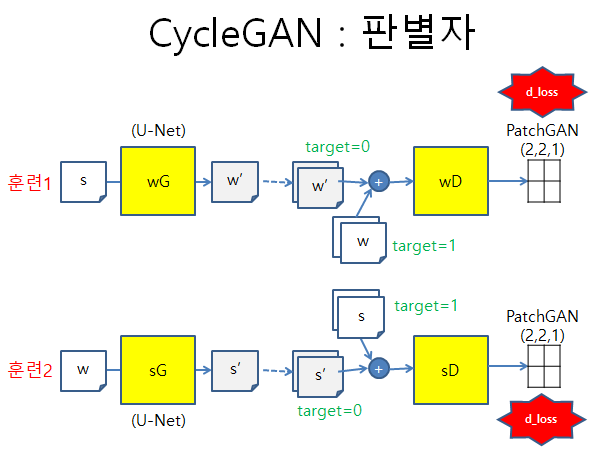

In [14]:
inputs = Input((32,32,3))

e1 = LeakyReLU(alpha=0.2)(inputs)
e1 = Conv2D(32, (3,3), strides=2, padding='same')(e1) # (16,16,32)

e2 = LeakyReLU(alpha=0.2)(e1)
e2 = Conv2D(64, (3,3), strides=2, padding='same')(e2) # (8,8,64)

e3 = LeakyReLU(alpha=0.2)(e2)
e3 = Conv2D(128, (3,3), strides=2, padding='same')(e3) # (4,4,128)

e4 = LeakyReLU(alpha=0.2)(e3)
e4 = Conv2D(256, (3,3), strides=1, padding='same')(e4) # (4,4,256)

x = LeakyReLU(alpha=0.2)(e4)
outputs = Conv2D(1, (3,3), strides=2, padding='same')(x) # (2,2,1) ==> PatchGAN

In [15]:
d_target = Model(inputs, outputs)

d_target.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 32)        896       
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 128)         73856     
__________

In [16]:
d_target.compile(loss='mse', optimizer=RMSprop(lr=2e-4, decay=6e-8), metrics=['acc'])

### discriminator for source

In [17]:
inputs = Input((32,32,1))

e1 = LeakyReLU(alpha=0.2)(inputs)
e1 = Conv2D(32, (3,3), strides=2, padding='same')(e1) # (16,16,32)

e2 = LeakyReLU(alpha=0.2)(e1)
e2 = Conv2D(64, (3,3), strides=2, padding='same')(e2) # (8,8,64)

e3 = LeakyReLU(alpha=0.2)(e2)
e3 = Conv2D(128, (3,3), strides=2, padding='same')(e3) # (4,4,128)

e4 = LeakyReLU(alpha=0.2)(e3)
e4 = Conv2D(256, (3,3), strides=1, padding='same')(e4) # (4,4,256)

x = LeakyReLU(alpha=0.2)(e4)
outputs = Conv2D(1, (3,3), strides=2, padding='same')(x) # (2,2,1) ==> PatchGAN

In [18]:
d_source = Model(inputs, outputs)

d_source.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 32, 32, 1)         0         
_________________________________________________________________
leaky_re_lu_20 (LeakyReLU)   (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 32)        320       
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 4, 4, 128)         73856     
__________

In [19]:
d_source.compile(loss='mse', optimizer=RMSprop(lr=2e-4, decay=6e-8), metrics=['acc'])

### CycleGAN 정의

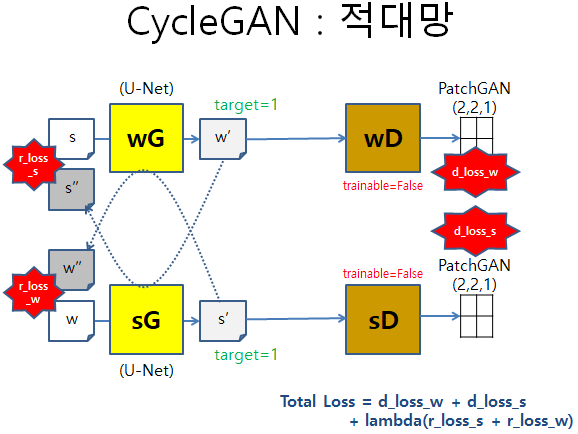

In [4]:
d_target.trainable = False
d_source.trainable = False

NameError: name 'd_target' is not defined

- for target

In [21]:
source_input = Input((32,32,1))
fake_target = g_target(source_input) # (32,32,3)
preal_target = d_target(fake_target) # (2,2,1)
reco_source = g_source(fake_target) # (32,32,1) ==> reconstruction

- for source

In [22]:
target_input = Input((32,32,3))
fake_source = g_source(target_input) # (32,32,1)
preal_source = d_source(fake_source) # (2,2,1)
reco_target = g_target(fake_source) # (32,32,3) ==> reconstruction

- identity loss<br>
. g_source 에 source 이미지를 넣어 원본과 같은지 비교한다.<br>
. 하지만 현재 source 와 target 의 이미지가 흑백/컬러 로 틀리기 때문에 적용할 수 없다

- gan 모델

In [23]:
loss = ['mse', 'mse', 'mae', 'mae']
loss_weights = [1., 1., 10., 10.]

inputs = [source_input, target_input]
outputs = [preal_target, preal_source, reco_source, reco_target]

In [24]:
adv = Model(inputs, outputs)
adv.compile(loss=loss, loss_weights=loss_weights,
            optimizer=RMSprop(lr=2e-4, decay=6e-8), metrics=['acc'])

adv.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 32, 32, 1)    0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
model_1 (Model)                 (None, 32, 32, 3)    869039      input_5[0][0]                    
                                                                 model_2[2][0]                    
__________________________________________________________________________________________________
model_2 (Model)                 (None, 32, 32, 1)    868461      model_1[1][0]                    
          

### Cifar-10 이미지

In [25]:
from keras.datasets import cifar10

In [26]:
(X_train, y_train), (_, _) = cifar10.load_data()

In [27]:
X_train.shape, X_train.dtype, X_train.max(), X_train.min()

((50000, 32, 32, 3), dtype('uint8'), 255, 0)

In [28]:
### 10,000 장만 훈련한다
X_train = X_train[:10000]/255

In [29]:
X_train.shape, X_train.dtype, X_train.max(), X_train.min()

((10000, 32, 32, 3), dtype('float64'), 1.0, 0.0)

In [30]:
X_source = X_train.mean(axis=3)[:,:,:,np.newaxis]

In [31]:
X_source.shape

(10000, 32, 32, 1)

In [32]:
X_target = X_train

Text(0.5,1,'X_target[0]')

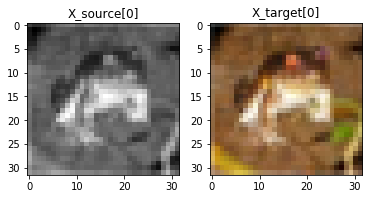

In [33]:
plt.subplot(1,2,1)
plt.imshow(X_source[0,:,:,0], cmap='gray')
plt.title('X_source[0]')
plt.subplot(1,2,2)
plt.imshow(X_target[0])
plt.title('X_target[0]')

### 훈련

In [34]:
from keras.preprocessing import image

valid = np.ones((32,2,2,1)) # (배치수,패치수,패치수,1)
fake = np.zeros((32,2,2,1))
y = np.concatenate((valid, fake)) # 앞부분은 valid(1), 뒷부분은 fake(0)

for step in range(1):
    indices = np.random.randint(0,10000,size=32) # samples: 10000, batch_size=32
    real_target = X_target[indices]
    
    indices = np.random.randint(0,10000,size=32) # samples: 10000, batch_size=32
    real_source = X_source[indices]
    
    ### d_target
    fake_target = g_target.predict(real_source)
    X = np.concatenate((real_target, fake_target))
    metrics = d_target.train_on_batch(X, y)
    print(step, '> d_target loss:', metrics[0])
    
    ### d_source
    fake_source = g_source.predict(real_target)
    X = np.concatenate((real_source, fake_source))
    metrics = d_source.train_on_batch(X, y)
    print(step, '> d_source loss:', metrics[0])
    
    ### adv
    X = [real_source, real_target]
    y = [valid, valid, real_source, real_target]
    metrics = adv.train_on_batch(X, y)
    print(step, '> adv loss:', metrics[0])
    
    ### image save
    img_target = g_target.predict(X_source[[0]])[0]
    img_source = g_source.predict(X_target[[0]])[0]
    
    img1 = image.array_to_img(img_target*255., scale=False)
    img1.save('target_%05d.png' % (step+1))
    img2 = image.array_to_img(img_source*255., scale=False)
    img2.save('source_%05d.png' % (step+1))
    
g_source.save("cyclegan-g_source.h5")
g_target.save("cyclegan-g_target.h5")

C:\Anaconda3\envs\py36\lib\site-packages\keras\engine\training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 > d_target loss: 0.5001584
0 > d_source loss: 0.5055338
0 > adv loss: 5.6087904


### Identity Loss

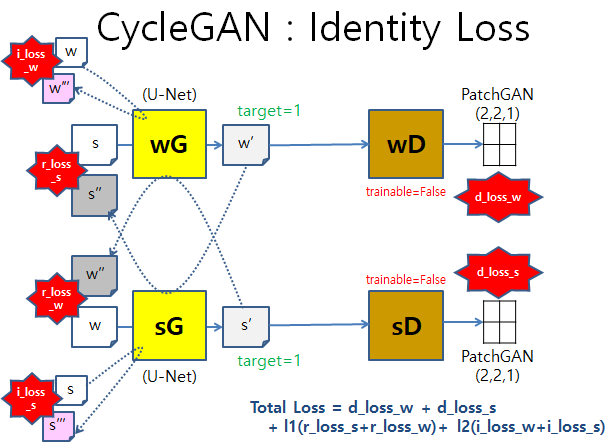

### Pix2Pix
- Pix2Pix – Image-to-Image Translation Neural Network (https://neurohive.io/en/popular-networks/pix2pix-image-to-image-translation/)

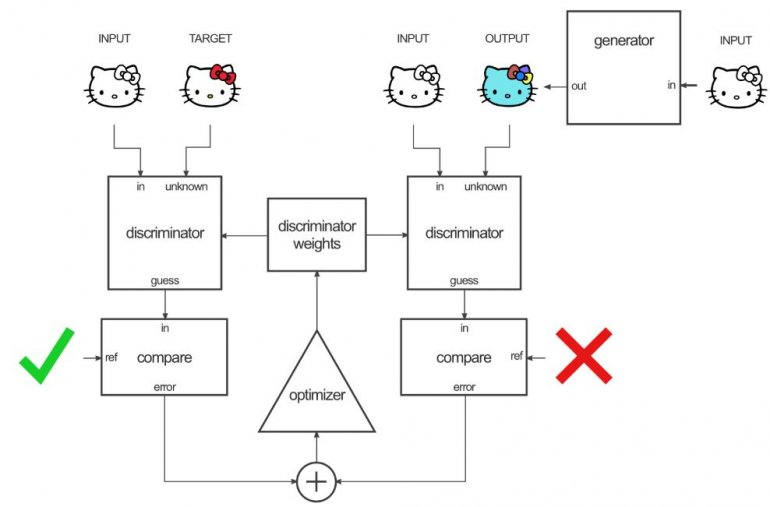

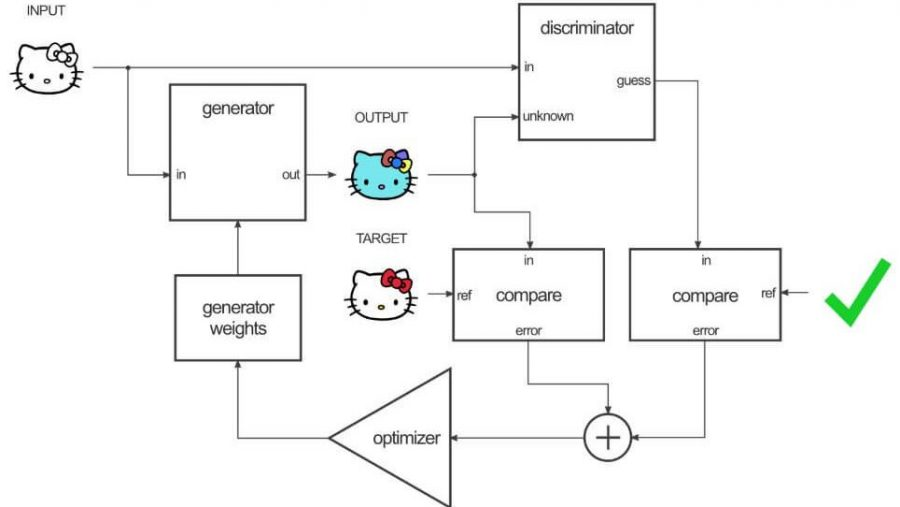

### U-Net
- Autoencoder 의 Encoder-Decoder 모델에서, Encoder 의 레이어를 Decoder 에 붙여 넣는다.

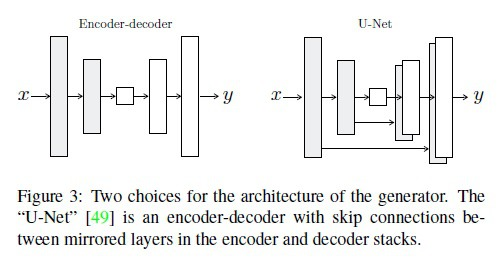
(출처: https://rm-7.tistory.com/3)

### Patch GAN

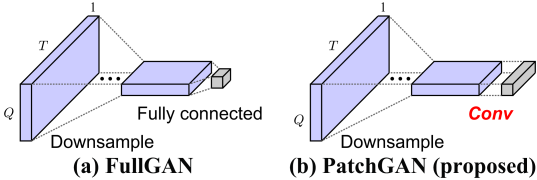

(출처: https://www.groundai.com/project/cyclegan-vc2-improved-cyclegan-based-non-parallel-voice-conversion/1)